In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import *
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler, quantile_transform, minmax_scale
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb

In [2]:
#Read files 
train = pd.read_csv("../input/train.csv")
test= pd.read_csv("../input/test.csv")

model1_oof = pd.read_csv("../utility/oof_{MODEL_IDENTIFIER}.csv")
model1_test = pd.read_csv("../utility/test_{MODEL_IDENTIFIER}.csv")

model2_oof = pd.read_csv("../utility/oof_GLOVE_PREPROCSSED_1.csv")
model2_test = pd.read_csv("../utility/test_GLOVE_PREPROCSSED_1.csv")

model3_oof = pd.read_csv("../utility/oof_logreg.csv")
model3_test = pd.read_csv("../utility/test_logreg.csv")

model4_oof = pd.read_csv("../utility/oof_Fasttext_moretuning_preprocessed.csv")
model4_test = pd.read_csv("../utility/test_Fasttext_moretuning_preprocessed.csv")

model5_oof = pd.read_csv("../utility/oof_fastext_nodrop.csv")
model5_test = pd.read_csv("../utility/test_fastext_nodrop.csv")

model6_oof = pd.read_csv("../utility/oof_fastext_minimum_preproc.csv")
model6_test = pd.read_csv("../utility/test_fastext_minimum_preproc.csv")

model7_oof = pd.read_csv("../utility/oof_fastext_minimum_preproc_reg.csv")
model7_test = pd.read_csv("../utility/test_fastext_minimum_preproc_reg.csv")

model8_oof = pd.read_csv("../utility/oof_fastext_extrafeats_newattnv2.csv")
model8_test = pd.read_csv("../utility/test_fastext_extrafeats_newattnv2.csv")

model9_oof = pd.read_csv("../utility/oof_fastext_extrafeats_newattn_v1.csv")
model9_test = pd.read_csv("../utility/test_fastext_extrafeats_newattn_v1.csv")

model10_oof = pd.read_csv("../utility/oof_fastext_extrafeats_nadam.csv")
model10_test = pd.read_csv("../utility/test_fastext_extrafeats_nadam.csv")

model11_oof = pd.read_csv("../utility/oof_fastext_extrafeats_nadam_high_len.csv")
model11_test = pd.read_csv("../utility/test_fastext_extrafeats_nadam_high_len.csv")

model12_oof = pd.read_csv("../utility/lvl0_wordbatch_clean_oof.csv")
model12_test = pd.read_csv("../utility/lvl0_wordbatch_clean_sub.csv")

model13_oof = pd.read_csv("../utility/Kaggle_Toxic/stacking/train/val_10fold_attn_am_0.9857.csv")
model13_test = pd.read_csv("../utility/Kaggle_Toxic/stacking/test/10fold_attn_am_0.9857.csv")

model14_oof = pd.read_csv("../utility/Kaggle_Toxic/stacking/train/val_10fold_cnngru_am_0.9861.csv")
model14_test = pd.read_csv("../utility/Kaggle_Toxic/stacking/test/10fold_cnngru_am_0.9861.csv")

model15_oof = pd.read_csv("../utility/Kaggle_Toxic/stacking/train/val_10fold_deepmoji_am_0.9862.csv")
model15_test = pd.read_csv("../utility/Kaggle_Toxic/stacking/test/10fold_deepmoji_am_0.9862.csv")

model16_oof = pd.read_csv("../utility/Kaggle_Toxic/stacking/train/val_10fold_gru_am_0.9857.csv")
model16_test = pd.read_csv("../utility/Kaggle_Toxic/stacking/test/10fold_gru_am_0.9857.csv")

model17_oof = pd.read_csv("../utility/Kaggle_Toxic/lgbm/lgbm_train_0.9796.csv")
model17_test = pd.read_csv("../utility/Kaggle_Toxic/lgbm/lgbm_test_0.9796.csv")

model18_oof = pd.read_csv("../utility/Kaggle_Toxic/logistic_regression/logreg1/logreg1_train_0.9805.csv")
model18_test = pd.read_csv("../utility/Kaggle_Toxic/logistic_regression/logreg1/logreg1_test_0.9805.csv")

model19_oof = pd.read_csv("../utility/oof_fastext_extrafeats_nadam_high_len2.csv")
model19_test = pd.read_csv("../utility/test_fastext_extrafeats_nadam_high_len2.csv")


print(model1_oof.columns, model2_oof.columns)

Index(['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object') Index(['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')


In [3]:
neptune1_oof = pd.read_csv("../utility/single_model_predictions_03092018/bad_word_logreg_predictions_train_oof.csv")
neptune1_test = pd.read_csv("../utility/single_model_predictions_03092018/bad_word_logreg_predictions_test_oof.csv")

neptune2_oof = pd.read_csv("../utility/single_model_predictions_03092018/char_vdcnn_predictions_train_oof.csv")
neptune2_test = pd.read_csv("../utility/single_model_predictions_03092018/char_vdcnn_predictions_test_oof.csv")

neptune3_oof = pd.read_csv("../utility/single_model_predictions_03092018/count_logreg_predictions_train_oof.csv")
neptune3_test = pd.read_csv("../utility/single_model_predictions_03092018/count_logreg_predictions_test_oof.csv")

neptune4_oof = pd.read_csv("../utility/single_model_predictions_03092018/fasttext_dpcnn_predictions_train_oof.csv")
neptune4_test = pd.read_csv("../utility/single_model_predictions_03092018/fasttext_dpcnn_predictions_test_oof.csv")

neptune5_oof = pd.read_csv("../utility/single_model_predictions_03092018/fasttext_gru_predictions_train_oof.csv")
neptune5_test = pd.read_csv("../utility/single_model_predictions_03092018/fasttext_gru_predictions_test_oof.csv")

neptune6_oof = pd.read_csv("../utility/single_model_predictions_03092018/fasttext_lstm_predictions_train_oof.csv")
neptune6_test = pd.read_csv("../utility/single_model_predictions_03092018/fasttext_lstm_predictions_test_oof.csv")

neptune7_oof = pd.read_csv("../utility/single_model_predictions_03092018/fasttext_scnn_predictions_train_oof.csv")
neptune7_test = pd.read_csv("../utility/single_model_predictions_03092018/fasttext_scnn_predictions_test_oof.csv")

neptune8_oof = pd.read_csv("../utility/single_model_predictions_03092018/glove_dpcnn_predictions_train_oof.csv")
neptune8_test = pd.read_csv("../utility/single_model_predictions_03092018/glove_dpcnn_predictions_test_oof.csv")


In [5]:
list_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate']
y = train.loc[:, list_cols].values

cvlist = list(StratifiedKFold(5, random_state=1).split(y, y[:,0]))

In [11]:
neptune1_oof.set_index("id").reindex(train.set_index("id").index)

toxic  severe_toxic   obscene    threat    insult  \
id                                                                       
0000997932d777bf  0.044064      0.001659  0.013039  0.000968  0.016669   
000103f0d9cfb60f  0.044157      0.001657  0.012832  0.000989  0.016690   
000113f07ec002fd  0.044157      0.001657  0.012832  0.000989  0.016690   
0001b41b1c6bb37e  0.044258      0.001699  0.012939  0.000994  0.016646   
0001d958c54c6e35  0.043991      0.001697  0.012837  0.000991  0.016550   
00025465d4725e87  0.044258      0.001699  0.012939  0.000994  0.016646   
0002bcb3da6cb337  0.993700      0.179141  0.990979  0.026580  0.888183   
00031b1e95af7921  0.044258      0.001699  0.012939  0.000994  0.016646   
00037261f536c51d  0.044258      0.001699  0.012939  0.000994  0.016646   
00040093b2687caa  0.043930      0.001614  0.012930  0.000988  0.016531   
0005300084f90edc  0.044157      0.001657  0.012832  0.000989  0.016690   
00054a5e18b50dd4  0.044157      0.001657  0.012832  0.000989  0.016690   
0005c987bdfc9d4b  0.043991      0.001697  0.012837  0.000991  0.016550   
0006f16e4e9f292e  0.043991      0.001697  0.012837  0.000991  0.016550   
00070ef96486d6f9  0.044020      0.001722  0.013022  0.000966  0.016800   
00078f8ce7eb276d  0.094512      0.005137  0.018097  0.004078  0.031709   
0007e25b2121310b  0.043991      0.001697  0.012837  0.000991  0.016550   
000897889268bc93  0.044020      0.001722  0.013022  0.000966  0.016800   
0009801bd85e5806  0.044194      0.001651  0.012843  0.000981  0.016765   
0009eaea3325de8c  0.044064      0.001659  0.013039  0.000968  0.016669   
000b08c464718505  0.043991      0.001697  0.012837  0.000991  0.016550   
000bfd0867774845  0.043908      0.001711  0.012983  0.000961  0.016551   
000c0dfd995809fa  0.044157      0.001657  0.012832  0.000989  0.016690   
000c6a3f0cd3ba8e  0.044194      0.001651  0.012843  0.000981  0.016765   
000cfee90f50d471  0.044064      0.001659  0.013039  0.000968  0.016669   
000eefc67a2c930f  0.044157      0.001657  0.012832  0.000989  0.016690   
000f35deef84dc4a  0.044038      0.001653  0.012923  0.001007  0.016654   
000ffab30195c5e1  0.520242      0.000623  0.367159  0.000751  0.106075   
0010307a3a50a353  0.043991      0.001697  0.012837  0.000991  0.016550   
0010833a96e1f886  0.043930      0.001614  0.012930  0.000988  0.016531   
...                    ...           ...       ...       ...       ...   
ffa33d3122b599d6  0.880235      0.007276  0.837503  0.002581  0.345052   
ffa95244f261527f  0.043991      0.001697  0.012837  0.000991  0.016550   
ffad104337fe9891  0.044064      0.001659  0.013039  0.000968  0.016669   
ffaed63c487a2b42  0.043832      0.001641  0.012794  0.000955  0.016524   
ffb268f37788a011  0.043991      0.001697  0.012837  0.000991  0.016550   
ffb47123b2d82762  0.952840      0.116695  0.911514  0.075021  0.760133   
ffb7b4c3d3ae5842  0.043991      0.001697  0.012837  0.000991  0.016550   
ffb93b0a0a1e78f9  0.043930      0.001614  0.012930  0.000988  0.016531   
ffb998f9749bd83e  0.043832      0.001641  0.012794  0.000955  0.016524   
ffba5332d6b8fd14  0.044038      0.001653  0.012923  0.001007  0.016654   
ffbc2db4225258dd  0.044157      0.001657  0.012832  0.000989  0.016690   
ffbcd64a71775e04  0.044020      0.001722  0.013022  0.000966  0.016800   
ffbd331a3aa269b9  0.043908      0.001711  0.012983  0.000961  0.016551   
ffbdbb0483ed0841  0.999152      0.951944  0.999910  0.159112  0.995688   
ffc2f409658571f1  0.044038      0.001653  0.012923  0.001007  0.016654   
ffc671f2acdd80e1  0.044020      0.001722  0.013022  0.000966  0.016800   
ffc7bbb177c3c966  0.044038      0.001653  0.012923  0.001007  0.016654   
ffca1e81aefc48ac  0.044038      0.001653  0.012923  0.001007  0.016654   
ffca8d71d71a3fae  0.044038      0.001653  0.012923  0.001007  0.016654   
ffcdcb71854f6d8a  0.044064      0.001659  0.013039  0.000968  0.016669   
ffd2e85b07b3c7e4  0.044157      0.001657  0.012832  0.000989  0.016690   
ffd72e9766c09c97  0.04393

In [ ]:
from scipy.stats import gmean, hmean

#MK models
gru_list = [model1_oof[list_cols].values,
                                 model2_oof[list_cols].values,
                                 model4_oof[list_cols].values,
                                 model5_oof[list_cols].values,
                                 model6_oof[list_cols].values,
                                 model7_oof[list_cols].values,
                                 model9_oof[list_cols].values,
                         model10_oof[list_cols].values,
                         model11_oof[list_cols].values,
                         model8_oof[list_cols].values,
            model13_oof[list_cols].values,
            model14_oof[list_cols].values,
            model15_oof[list_cols].values,
            #model16_oof[list_cols].values,
            model19_oof[list_cols].values,
                                ]
gru_list = [minmax_scale(ps) for ps in gru_list]
gmean1 = np.mean(np.array(gru_list), axis=0)
print(roc_auc_score(y, gmean1))

nep_list = [#neptune1_oof.set_index("id").reindex(train.set_index("id").index)[list_cols].values,
            #neptune2_oof.set_index("id").reindex(train.set_index("id").index)[list_cols].values,
            #neptune3_oof.set_index("id").reindex(train.set_index("id").index)[list_cols].values,
            neptune4_oof.set_index("id").reindex(train.set_index("id").index)[list_cols].values,
            neptune5_oof.set_index("id").reindex(train.set_index("id").index)[list_cols].values,
            neptune6_oof.set_index("id").reindex(train.set_index("id").index)[list_cols].values,
            neptune7_oof.set_index("id").reindex(train.set_index("id").index)[list_cols].values,
            neptune8_oof.set_index("id").reindex(train.set_index("id").index)[list_cols].values,
                                ]
nep_list = [minmax_scale(ps) for ps in nep_list]
gmean11 = gmean(np.array(nep_list), axis=0)
print(roc_auc_score(y, gmean11))

gmean12 = np.mean(np.array(gru_list + nep_list), axis=0)
print(roc_auc_score(y, gmean12))

gru_test_list = [model1_test[list_cols].values, 
                               model2_test[list_cols].values,
                               #model3_test[list_cols].values,
                               model4_test[list_cols].values,
                               model6_test[list_cols].values,
                               model7_test[list_cols].values,
                               model8_test[list_cols].values,
                               model9_test[list_cols].values,
                               model10_test[list_cols].values,
                               model11_test[list_cols].values,
            model13_test[list_cols].values,
            model14_test[list_cols].values,
            model15_test[list_cols].values,
            #model16_test[list_cols].values,
            model19_test[list_cols].values,
                              ]
gru_test_list = [minmax_scale(ps) for ps in gru_test_list]
gtest1 = np.mean(np.array(gru_test_list), axis=0)

gmean2 = np.mean([ minmax_scale(model3_oof[list_cols].values), minmax_scale(model12_oof[list_cols].values),
                  
                                ], axis=0)

gmean3 = gmean([minmax_scale(model13_oof[list_cols].values),
                 minmax_scale(model14_oof[list_cols].values),
                 minmax_scale(model15_oof[list_cols].values),
                 minmax_scale(model16_oof[list_cols].values),
               ], axis=0)

gtest2 = np.mean([ minmax_scale(model3_test[list_cols].values), minmax_scale(model12_test[list_cols].values),
                  
                                ], axis=0)

oof_stacked = gmean([minmax_scale(gmean1), minmax_scale(gmean2)], axis=0)
test_stacked = gmean([minmax_scale(gtest1), minmax_scale(gtest2)], axis=0)
print(roc_auc_score(y, gmean2))
print(roc_auc_score(y, gmean3))
roc_auc_score(y, oof_stacked)

0.992345196064962


In [245]:
X_train = np.concatenate((gmean1,
                          model3_oof[list_cols].values,
                          model12_oof[list_cols].values,
                         ), axis=1)
X_test = np.concatenate((gtest1, 
                         model3_test[list_cols].values,
                         model12_test[list_cols].values,
                        ), axis=1)

print(X_train.shape, X_test.shape)

(159571, 18) (153164, 18)


In [246]:
def predict_proba_corr(preds, target_mean):
    #preds = self.predict_proba(X)[:,1]
    d0 = target_mean
    d1 = 1 - d0
    r0 = np.mean(preds)
    r1 = 1 - r0
    gamma_0 = r0/d0
    gamma_1 = r1/d1
    return gamma_1*preds/(gamma_1*preds + gamma_0*(1 - preds))

In [247]:
#for i in range(X_train.shape[1]):
#    X_train[:, i] = predict_proba_corr(X_train[:, i], 0.1)
#    X_test[:, i] = predict_proba_corr(X_test[:, i], 0.1)

In [248]:
#[:, [i+6*j for j in range(7)]]

In [249]:
model = lgb.LGBMClassifier(n_estimators=1200, num_leaves=8, learning_rate=0.01, verbose=1,
                           subsample=0.8, colsample_bytree=0.8, reg_lambda=0.0, min_child_weight=2)

oof_stacked = np.zeros((len(model1_oof), len(list_cols)))
test_stacked = []
for i, col in enumerate(list_cols):
    y_tmp = y[:, i]
#    model = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=50, class_weight='balanced', n_jobs=-1)
#    model = lgb.LGBMClassifier(n_estimators=100, num_leaves=8, learning_rate=0.1, min_child_samples=500,
#                               subsample=0.9, colsample_bytree=0.8, reg_lambda=1.0, class_weight='balanced')
#    model = LogisticRegression(C=1)
    oof_stacked[:, i] = cross_val_predict(model, X_train, y_tmp, cv=cvlist, n_jobs=1, method='predict_proba', 
                                          )[:,1]
    print(oof_stacked.shape)
    #y_preds2.append(preds)
    test_stacked.append(model.fit(X_train, y_tmp).predict_proba(X_test))
    print("Score for class {} is {}".format(col, roc_auc_score(y_tmp, oof_stacked[:, i])))
print("Over auc score", roc_auc_score(y, oof_stacked))

(159571, 6)
Score for class toxic is 0.9886946639183934
(159571, 6)
Score for class severe_toxic is 0.991956831504742
(159571, 6)
Score for class obscene is 0.9954958381304293
(159571, 6)
Score for class threat is 0.9945982885671435
(159571, 6)
Score for class insult is 0.9903036557970191
(159571, 6)
Score for class identity_hate is 0.9920796354188534
Over auc score 0.9921881522227634


In [220]:
MODEL_IDENTIFIER = "stacked_5"
oof_preds: pd.DataFrame = train[['id']]
for i, col in enumerate(list_cols):
    oof_preds.loc[:, col] = oof_stacked[:, i]

test_preds: pd.DataFrame = test[['id']]
for i, col in enumerate(list_cols):
    test_preds.loc[:, col] = test_stacked[:, i]   

oof_preds.to_csv("../utility/oof_{}.csv".format(MODEL_IDENTIFIER), index=False)
test_preds.to_csv("../utility/test_{}.csv".format(MODEL_IDENTIFIER), index=False)

/home/mohsin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/mohsin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [63]:
gmean([test_plb[list_cols].values, test_preds[list_cols].values], axis=0)

array([[9.85980058e-01, 4.71923958e-01, 9.72496913e-01, 1.73494364e-01,
        9.34983064e-01, 5.16342181e-01],
       [4.30492381e-03, 1.00439604e-03, 1.75538739e-03, 7.42955492e-04,
        2.08850366e-03, 9.86880107e-04],
       [6.82867249e-03, 1.47147280e-03, 3.26705052e-03, 9.63247049e-04,
        2.96999773e-03, 1.81179661e-03],
       ...,
       [2.65354935e-03, 5.61014518e-04, 2.11775932e-03, 4.03977063e-04,
        1.10273836e-03, 7.38213246e-04],
       [5.55427234e-03, 8.66783624e-04, 1.57755969e-03, 8.34993382e-04,
        2.34751515e-03, 9.71989459e-03],
       [9.64330109e-01, 3.11348319e-02, 7.80260383e-01, 7.59632859e-03,
        4.84106545e-01, 1.12813272e-02]])

In [262]:
#blend with public
test_blended = test_preds.copy()
test_plb =  pd.read_csv("../utility/blend_it_all.csv")
test_blended[list_cols] = minmax_scale(test_plb[list_cols]) *0.5 + minmax_scale(test_preds[list_cols]) * 0.5

test_blended.to_csv("../utility/test_blendedv6.csv", index=False)

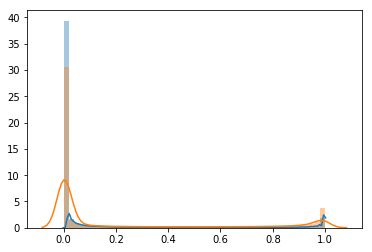

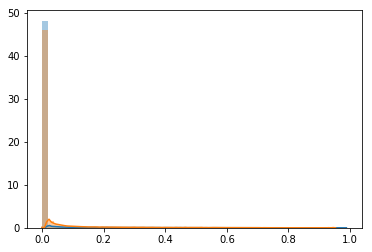

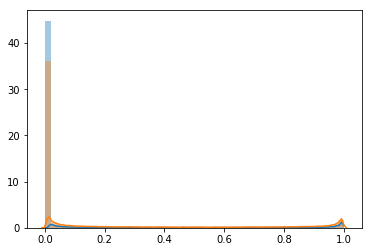

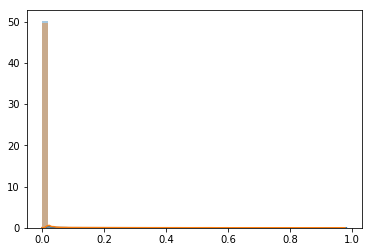

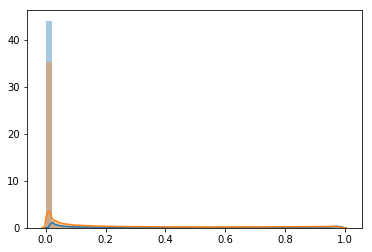

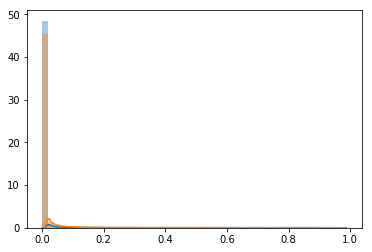

In [13]:
#Explore errors
#Let's explore toxic
#check distribution of coefs
import seaborn as sns
import matplotlib.pyplot as plt
for i in range(6):
    sns.distplot(oof_stacked[:, i])
    sns.distplot(test_stacked[:, i])
    plt.show()

In [34]:
hateid_errs = pd.DataFrame()
hateid_errs["comment_text"]= train.comment_text.loc[np.abs(oof_stacked[:, 0] - y[:, 0]) > 0.3]
hateid_errs["preds"] = (oof_stacked[:, 0])[np.abs(oof_stacked[:, 0] - y[:, 0])  > 0.3]
hateid_errs["actual"] = (y[:, 0])[np.abs(oof_stacked[:, 0] - y[:, 0])  > 0.3]
hateid_errs["err"] = (oof_stacked[:, 0] - y[:, 0])[np.abs(oof_stacked[:, 0] - y[:, 0])  > 0.3]

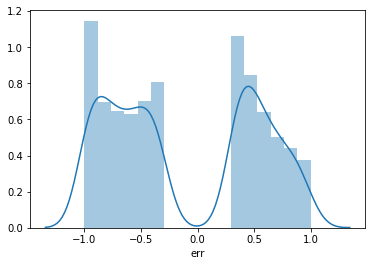

In [52]:
sns.distplot(hateid_errs["err"])
plt.show()

In [53]:
list(hateid_errs.loc[hateid_errs.err < -0.9].values)

[array(['Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...',
        0.030016476829258024, 1, -0.969983523170742], dtype=object),
 array(['"\n\nSORRY PUCK BUT NO ONE EVER SAID DICK WAS NUMBER ONE!! But he is clearly listed as being ""second only to Batman"" and a ""master detective and martial artist"" and been trained in all the mentioned combat discplines. No need to mention in skills/abilities about the battles he\'s lost and won because thats not what an encylopia is supposed to do. \n\nAlso, what your problem is your going by low end showings and not HIGH end showings where he\'s proven more than a match for a meta like Slade and pinned Shiva down in one of his earliest appearences.\n "',
        0.0161376274187

In [41]:
hateid_errs.shape

(7884, 4)

In [ ]:
#ALL CAPS WORDS - certainly a big indicator of toxic

#Replace musalman by muslim

#Replace top curse words with spaces to proper words

#Spell corrector only for curse words 

#manually correct wrong labels